In [1]:
# Decision Tree Algorithm

#         DATASTET
#             |
#             |
#     ---- ! value >---- SETOSA
#     |
#     |
#     value > verisoloe
#     !
#     virginica

# if petal.le <= value THEN class = setosa
# ELSE IF petal.wd <= value THEN class = versicolor
# ELSE class = virginica

In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [3]:
# Read the data
df = pd.read_csv("iris.csv")
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [4]:
# Encode variety
le = LabelEncoder()
df["variety_encoded"] = le.fit_transform(df['variety'])
df['variety_encoded'].unique()
df

,sepal.length,sepal.width,petal.length,petal.width,variety,variety_encoded
0,5.1,3.5,1.4,0.2,Setosa,0
1,4.9,3.0,1.4,0.2,Setosa,0
2,4.7,3.2,1.3,0.2,Setosa,0
3,4.6,3.1,1.5,0.2,Setosa,0
4,5.0,3.6,1.4,0.2,Setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica,2
146,6.3,2.5,5.0,1.9,Virginica,2
147,6.5,3.0,5.2,2.0,Virginica,2
148,6.2,3.4,5.4,2.3,Virginica,2


In [5]:
# Features and target
X = df[['sepal.length','sepal.width','petal.length','petal.width']]
y = df['variety_encoded']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [9]:
# Test the model
y_pred = model.predict(X_test)

# Get the accuracy score foo the model
accuracy = accuracy_score(y_test, y_pred)
accuracy * 100

100.0

In [10]:
model.predict([[6.2,3.4,5.4,2.3]])

e:\Code\Lectures\Python-ML-Django-June-2025\mlvenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([2])

In [ ]:
# Decision tree does not have any mathematical equations.
# Rather than, it has rules of if-else
treeRules = export_text(model, feature_names=list(X.columns), show_weights=True)
print(treeRules)

|--- petal.length <= 2.45
|   |--- weights: [40.00, 0.00, 0.00] class: 0
|--- petal.length >  2.45
|   |--- petal.length <= 4.75
|   |   |--- petal.width <= 1.65
|   |   |   |--- weights: [0.00, 36.00, 0.00] class: 1
|   |   |--- petal.width >  1.65
|   |   |   |--- weights: [0.00, 0.00, 1.00] class: 2
|   |--- petal.length >  4.75
|   |   |--- petal.width <= 1.75
|   |   |   |--- petal.length <= 4.95
|   |   |   |   |--- weights: [0.00, 2.00, 0.00] class: 1
|   |   |   |--- petal.length >  4.95
|   |   |   |   |--- petal.width <= 1.55
|   |   |   |   |   |--- weights: [0.00, 0.00, 3.00] class: 2
|   |   |   |   |--- petal.width >  1.55
|   |   |   |   |   |--- petal.length <= 5.45
|   |   |   |   |   |   |--- weights: [0.00, 2.00, 0.00] class: 1
|   |   |   |   |   |--- petal.length >  5.45
|   |   |   |   |   |   |--- weights: [0.00, 0.00, 1.00] class: 2
|   |   |--- petal.width >  1.75
|   |   |   |--- petal.length <= 4.85
|   |   |   |   |--- sepal.width <= 3.10
|   |   |   |   |  

In [ ]:
# Confusion Matrix
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

Text(0.5, 1.0, 'Confusion Matrix - Test Set')

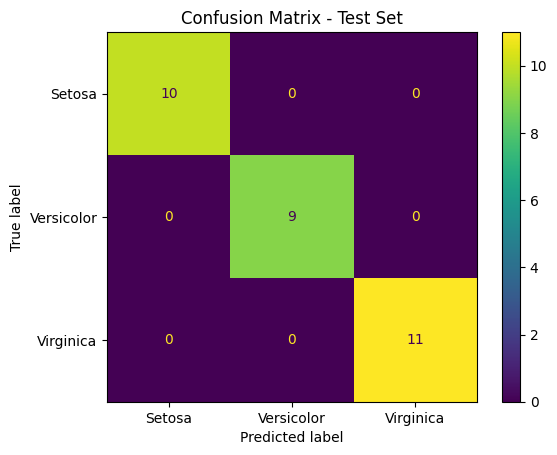

In [15]:
# Visualize Confusion Matrix
cmv = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=le.classes_)
cmv.plot(cmap="viridis")
plt.title("Confusion Matrix - Test Set")

Text(0.5, 1.0, 'Decision Tree Structure')

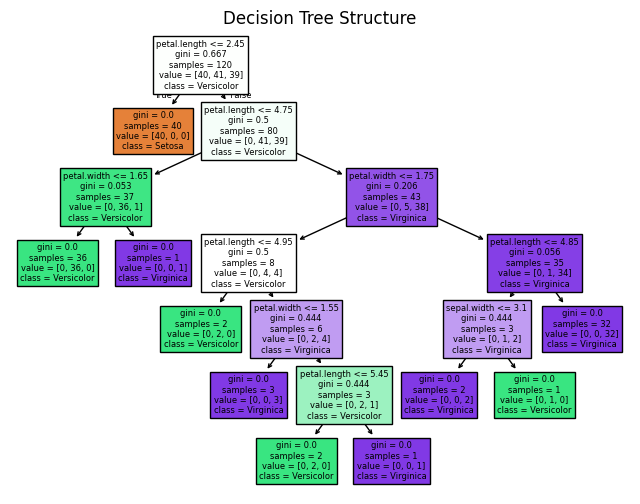

In [17]:
# Visual Decision Tree
plt.figure(figsize=(8,6))
plot_tree(model, feature_names=X.columns, class_names=le.classes_, filled=True)
plt.title("Decision Tree Structure")

e:\Code\Lectures\Python-ML-Django-June-2025\mlvenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


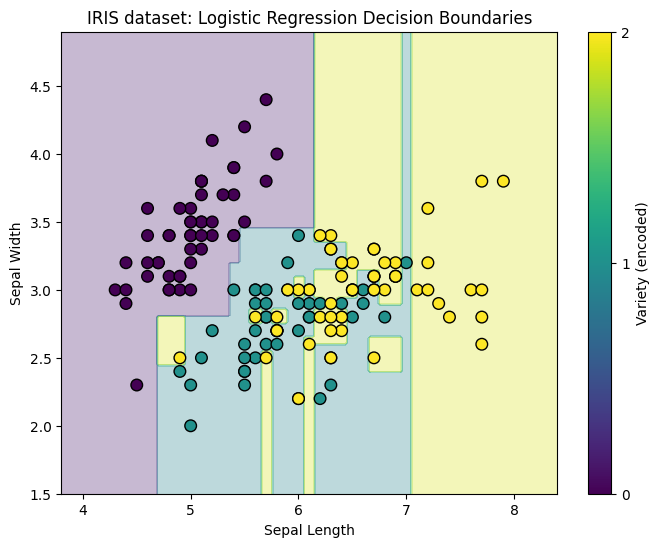

In [21]:
# Plot decision boundaries
X_plot = df[['sepal.length', 'sepal.width']]
y_plot = df['variety_encoded']

model_2d = DecisionTreeClassifier(random_state=42).fit(X_plot, y_plot)

x_min, x_max = X_plot.iloc[:, 0].min()-0.5, X_plot.iloc[:, 0].max()+0.5
y_min, y_max = X_plot.iloc[:, 1].min()-0.5, X_plot.iloc[:, 1].max()+0.5

xx , yy = np.meshgrid(
    np.linspace(x_min, x_max, 200),
    np.linspace(y_min, y_max, 200)
)

z = model_2d.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, z, alpha=0.3, cmap='viridis')
scatter = plt.scatter(X_plot.iloc[:,0], X_plot.iloc[:, 1], c=y_plot, cmap="viridis", edgecolors='k', s=70)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('IRIS dataset: Logistic Regression Decision Boundaries')
plt.colorbar(scatter, ticks=[0,1,2], label="Variety (encoded)")